## EDA

### Descriptive Statistics:
Calculate **basic statistics** like **mean, median, and standard deviation** for the 'Rating,' 'Aroma,' 'Acidity,' 'Body,' 'Flavor,' 'Aftertaste,' and 'Price' columns to get an overall understanding of the dataset. Find out how often different roasters and locations appear in the dataset. 

### Distributions:
Visualize the **distributions** of 'Rating,' 'Aroma,' 'Acidity,' 'Body,' 'Flavor,' and 'Aftertaste' using to understand the spread of values.

### Correlations:
Investigate the **correlations** between different attributes such as 'Rating,' 'Aroma,' 'Acidity,' 'Body,' 'Flavor,' and 'Aftertaste.' Identify which attributes tend to go together or have an impact on the overall rating.

### Top Roasters and Coffees:
Identify the top-rated roasters and coffee names based on the 'Rating' column. 

### Quantity Analysis:
Investigate the 'Quantity' and 'Unit' columns to understand the different packaging sizes and units in which coffee is sold. Analyze how these factors relate to pricing and consumer preferences.

### Roaster Performance:
Evaluate roasters' performance based on their ratings and the origin of the coffee beans. Are there specific regions or origins associated with higher ratings for particular roasters?

## Deeper Analysis:

### Geospatial Analysis:
Analyze the 'Roaster_Location' and 'Origin' columns to understand where the roasters are located and where the coffee beans are sourced from. You can use geospatial tools to create maps or investigate the relationship between origin and rating.

### Currency Analysis:
Analyze the 'Currency' column to understand the currencies used for pricing. You can convert prices to a common currency (e.g., USD) for comparison.

### Price Analysis:
Analyze the relationship between 'Price' and 'Rating.' Do higher-priced coffees tend to have higher ratings? You can also look for outliers in pricing.Investigate the relationship between pricing ('Price' and 'Currency') and sensory attributes ('Aroma,' 'Acidity,' 'Body,' 'Flavor,' 'Aftertaste'). Are there pricing strategies associated with higher ratings?

### Text Analysis:
Perform natural language processing (NLP) on the 'Review_Description,' 'Blind_Assessment,' and 'Notes' columns to extract insights about the sensory descriptions, flavor profiles, and unique characteristics of the coffees.



### Distribution of Ratings:

Visualize the distribution of coffee ratings to see the overall quality of coffees reviewed. This could be done using histograms or boxplots.

### Geographic Analysis:
Map the roaster locations to visualize geographic distributions and densities of coffee roasters.
Compare the coffee origins to their corresponding ratings and prices to see if certain regions consistently produce higher-rated or more expensive coffees.

### Investigate the relationship between price and quality.

Do higher prices correlate with higher ratings?
Adjust prices for inflation using the consumer price index to analyze real price changes over time.

### Roast Level Analysis

Compare the average ratings, aroma, body, and flavor profiles between different roast levels.
Determine if certain coffee origins tend to have specific roast levels.

### Generate word clouds

Use 'notes' and 'blind_assessment' columns to visualize the most frequent descriptors used in coffee reviews.
Correlation Analysis:

### Perform correlation analysis
Numeric variables such as rating, price, acidity, body, flavor, and aftertaste. This can help identify which factors are most closely associated with high-quality coffee.

### Text Analysis on Coffee Descriptions:

Use natural language processing to analyze the text data in coffee descriptions. Extract common themes or topics that appear in higher-rated coffees.

### Impact of Coffee Variety:

Investigate if certain varieties of Arabica, like Geisha, consistently receive higher ratings compared to others.

### Comparative Analysis by Country:

Compare average coffee ratings and price by country of origin and roaster location. This can reveal which countries are known for better quality or more expensive coffees.

`

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import seaborn.objects as so 

# set dpi
rcParams['savefig.dpi'] = 300

In [2]:
data_dir = Path('../../data')
file = data_dir / 'processed' / '05052024_roast_review_cleaned.csv'
df = pd.read_csv(file)

In [3]:
def tweak_df(df: pd.DataFrame) -> pd.DataFrame:
    cols_to_drop = ['territorial_entity_1_identifiers', 'territorial_entity_2_identifiers',
                    'roaster_location_identifier', 'territorial_entity_1', 'territorial_entity_2',
                    'est_price', 'consumer_price_index', 'quantity_value', 'quantity_unit',]
    return (df
            .drop(columns=cols_to_drop)
            .astype({'coffee_origin_country': 'category', 'roast_level': 'category',
                     'roaster_us_state': 'category', 'roaster_country': 'category',
                     'review_date': 'datetime64[ns]'})
            .rename(columns={"price_usd_adj_2024_per_lb": "price_usd_lb_2024"})
            .replace(r"Gesha", "Geisha", regex=True)
            .replace("Democratic Republic of the Congo", "Congo (DRC)")
            .replace("People's Republic of China", "China")
    )

coffee = tweak_df(df)
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rating                 4232 non-null   int64         
 1   roaster                4232 non-null   object        
 2   title                  4232 non-null   object        
 3   blind_assessment       4232 non-null   object        
 4   bottom_line            2760 non-null   object        
 5   roaster_location       4232 non-null   object        
 6   coordinate location    4232 non-null   object        
 7   og_roaster_location    4232 non-null   object        
 8   roaster_country        4232 non-null   category      
 9   coffee_origin          4232 non-null   object        
 10  coffee_origin_country  4232 non-null   category      
 11  roast_level            4232 non-null   category      
 12  agtron                 4232 non-null   object        
 13  rev

## Overview
Lets look at general characteristics of the dataset. 

In [4]:
cols_to_desc = ['rating', 'price_usd_lb_2024', 'review_date']
coffee[cols_to_desc].describe()

,rating,price_usd_lb_2024,review_date
count,4232.000000,4232.000000,4232
mean,92.724008,50.704308,2018-02-15 12:47:38.223062272
min,75.000000,5.360000,2010-03-01 00:00:00
25%,92.000000,25.600000,2014-08-01 00:00:00
50%,93.000000,30.425000,2018-10-01 00:00:00
75%,94.000000,41.345000,2021-11-01 00:00:00
max,98.000000,5180.000000,2024-01-01 00:00:00
std,1.888504,123.361985,NaN


Coffee total ratings are on a 100 point scale. Ratings are meant to be interpreted as [follows](https://www.coffeereview.com/how-coffee-review-works/):

> 97+ = Means: “We have not tasted a coffee of this style as splendid as this one for a long, long time”
>
> 95-96 = Perfect in structure, flawless, and shockingly distinctive and beautiful
>
> 93-94 = Exceptional originality, beauty, individuality and distinction, with no significant negative issues whatsoever
>
> 91-92 = An very good to outstanding coffee with excitement and distinction in aroma and flavor – or an exceptional coffee that still perhaps has some issue that some consumers may object to but others will love – a big, slightly imbalanced acidity, for example, or an overly lush fruit
> 
> 89-90 = A very good coffee, drinkable, with considerable distinction and interest.
> 
> 87-88 = An interesting coffee but either distinctive yet mildly flawed, or solid but not exciting.
> 
> 85/86 = An acceptable, solid coffee, but nothing exceptional — the best high-end supermarket whole bean.

Our dataset contains 4232 roast reviews from March 2010 to January 2024. Ratings vary from 75 to 98 with a median score of 93. Coffeereviews.com chooses to focus their reviews on quality specialty coffees, so it is expected that the ratings are generally high. We therefore cannot take this dataset to represent a sample of available specialty coffees. But it is still valuable to understand what characteristics are associated variation in ratings and prices. 


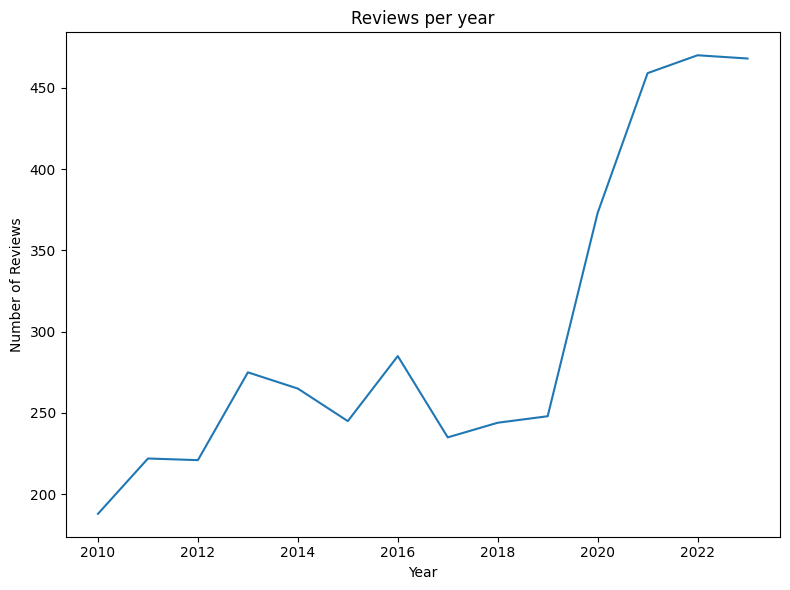

In [16]:
# Reviews per year over time
reviews_per_year = coffee[coffee['review_date'].dt.year < 2024]['review_date'].dt.year.value_counts().sort_index()

fig = plt.figure(figsize=(8,6))
sns.lineplot(data=reviews_per_year)
plt.ylabel('Number of Reviews')
plt.title('Reviews per year')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

<Axes: xlabel='year', ylabel='rating'>

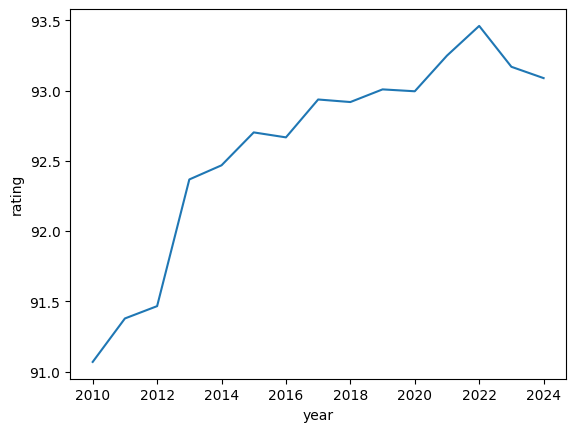

In [31]:
# Average price and rating over time
avg_price = coffee.set_index('review_date').resample('Y').rating.mean().reset_index()
avg_price['year'] = avg_price['review_date'].dt.year

sns.lineplot(avg_price, x='year', y='rating')


In [ ]:
# Distributions of prices, ratings, quality measures
# Correlations between price, rating, quality measures

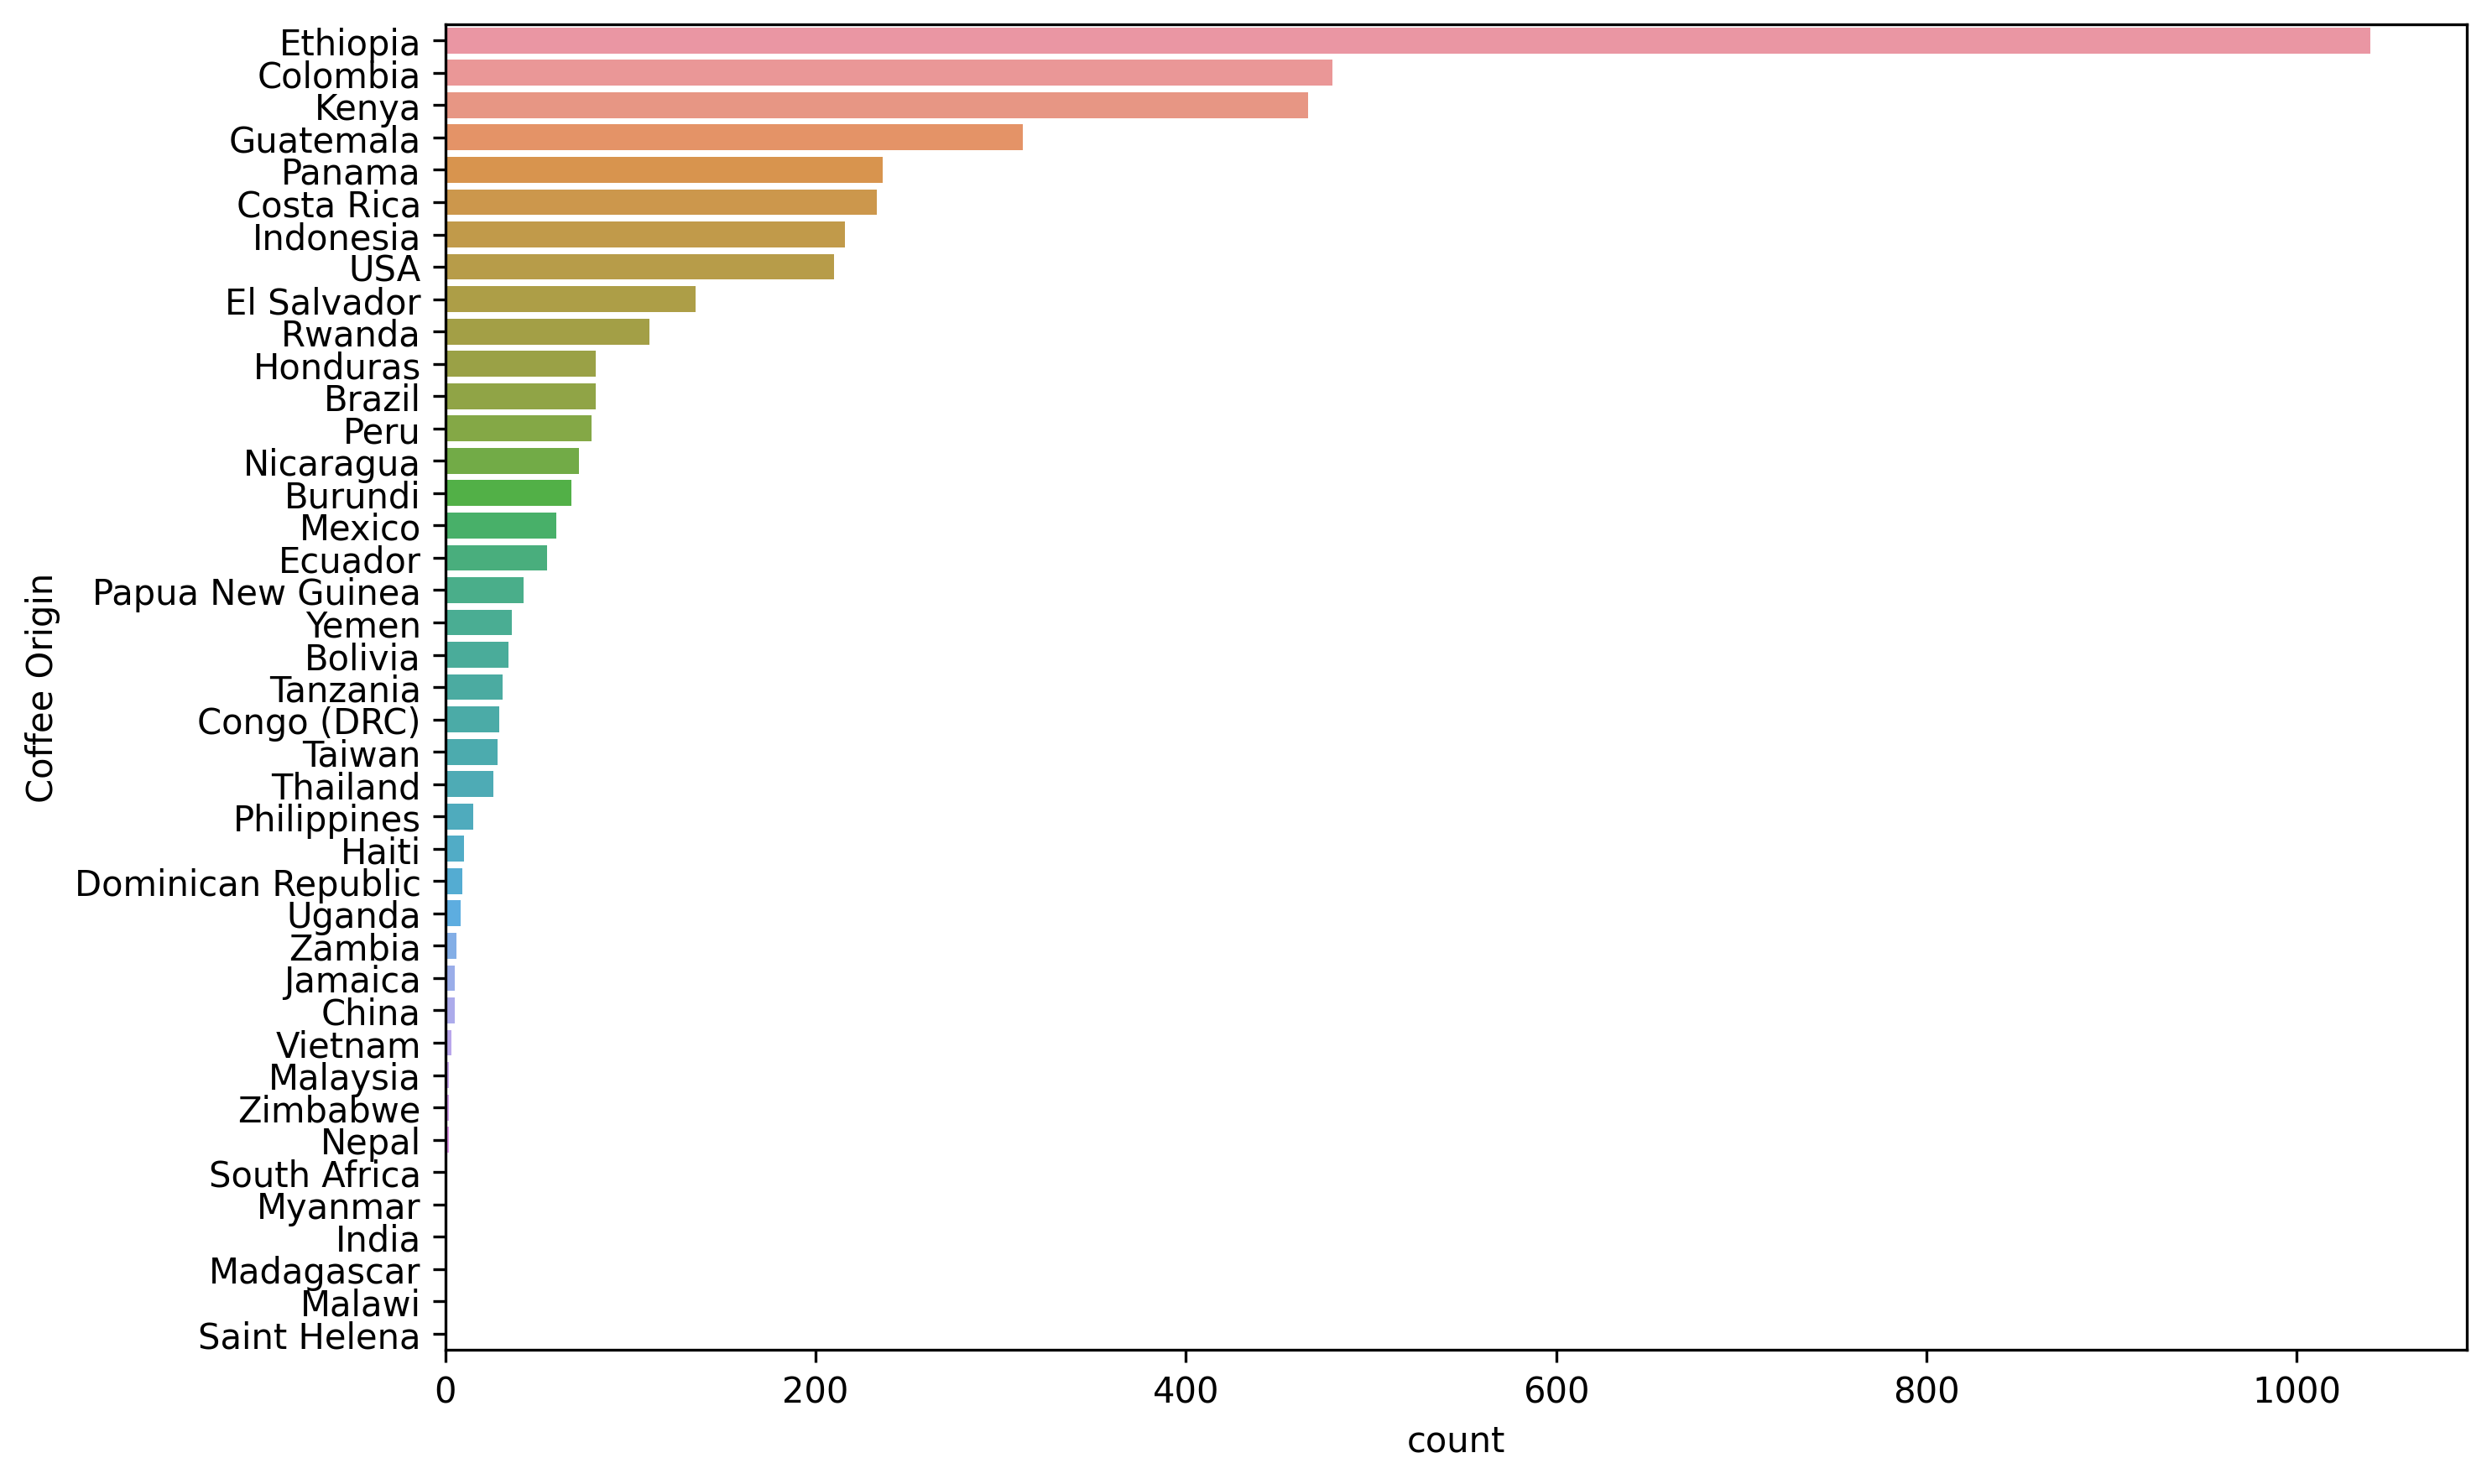

In [7]:
country_count = coffee['coffee_origin_country'].value_counts().reset_index().sort_values('count', ascending=False)

plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(data=country_count, y='coffee_origin_country', x='count', order=country_count['coffee_origin_country'])
plt.ylabel('Coffee Origin')
plt.tight_layout()
plt.show()

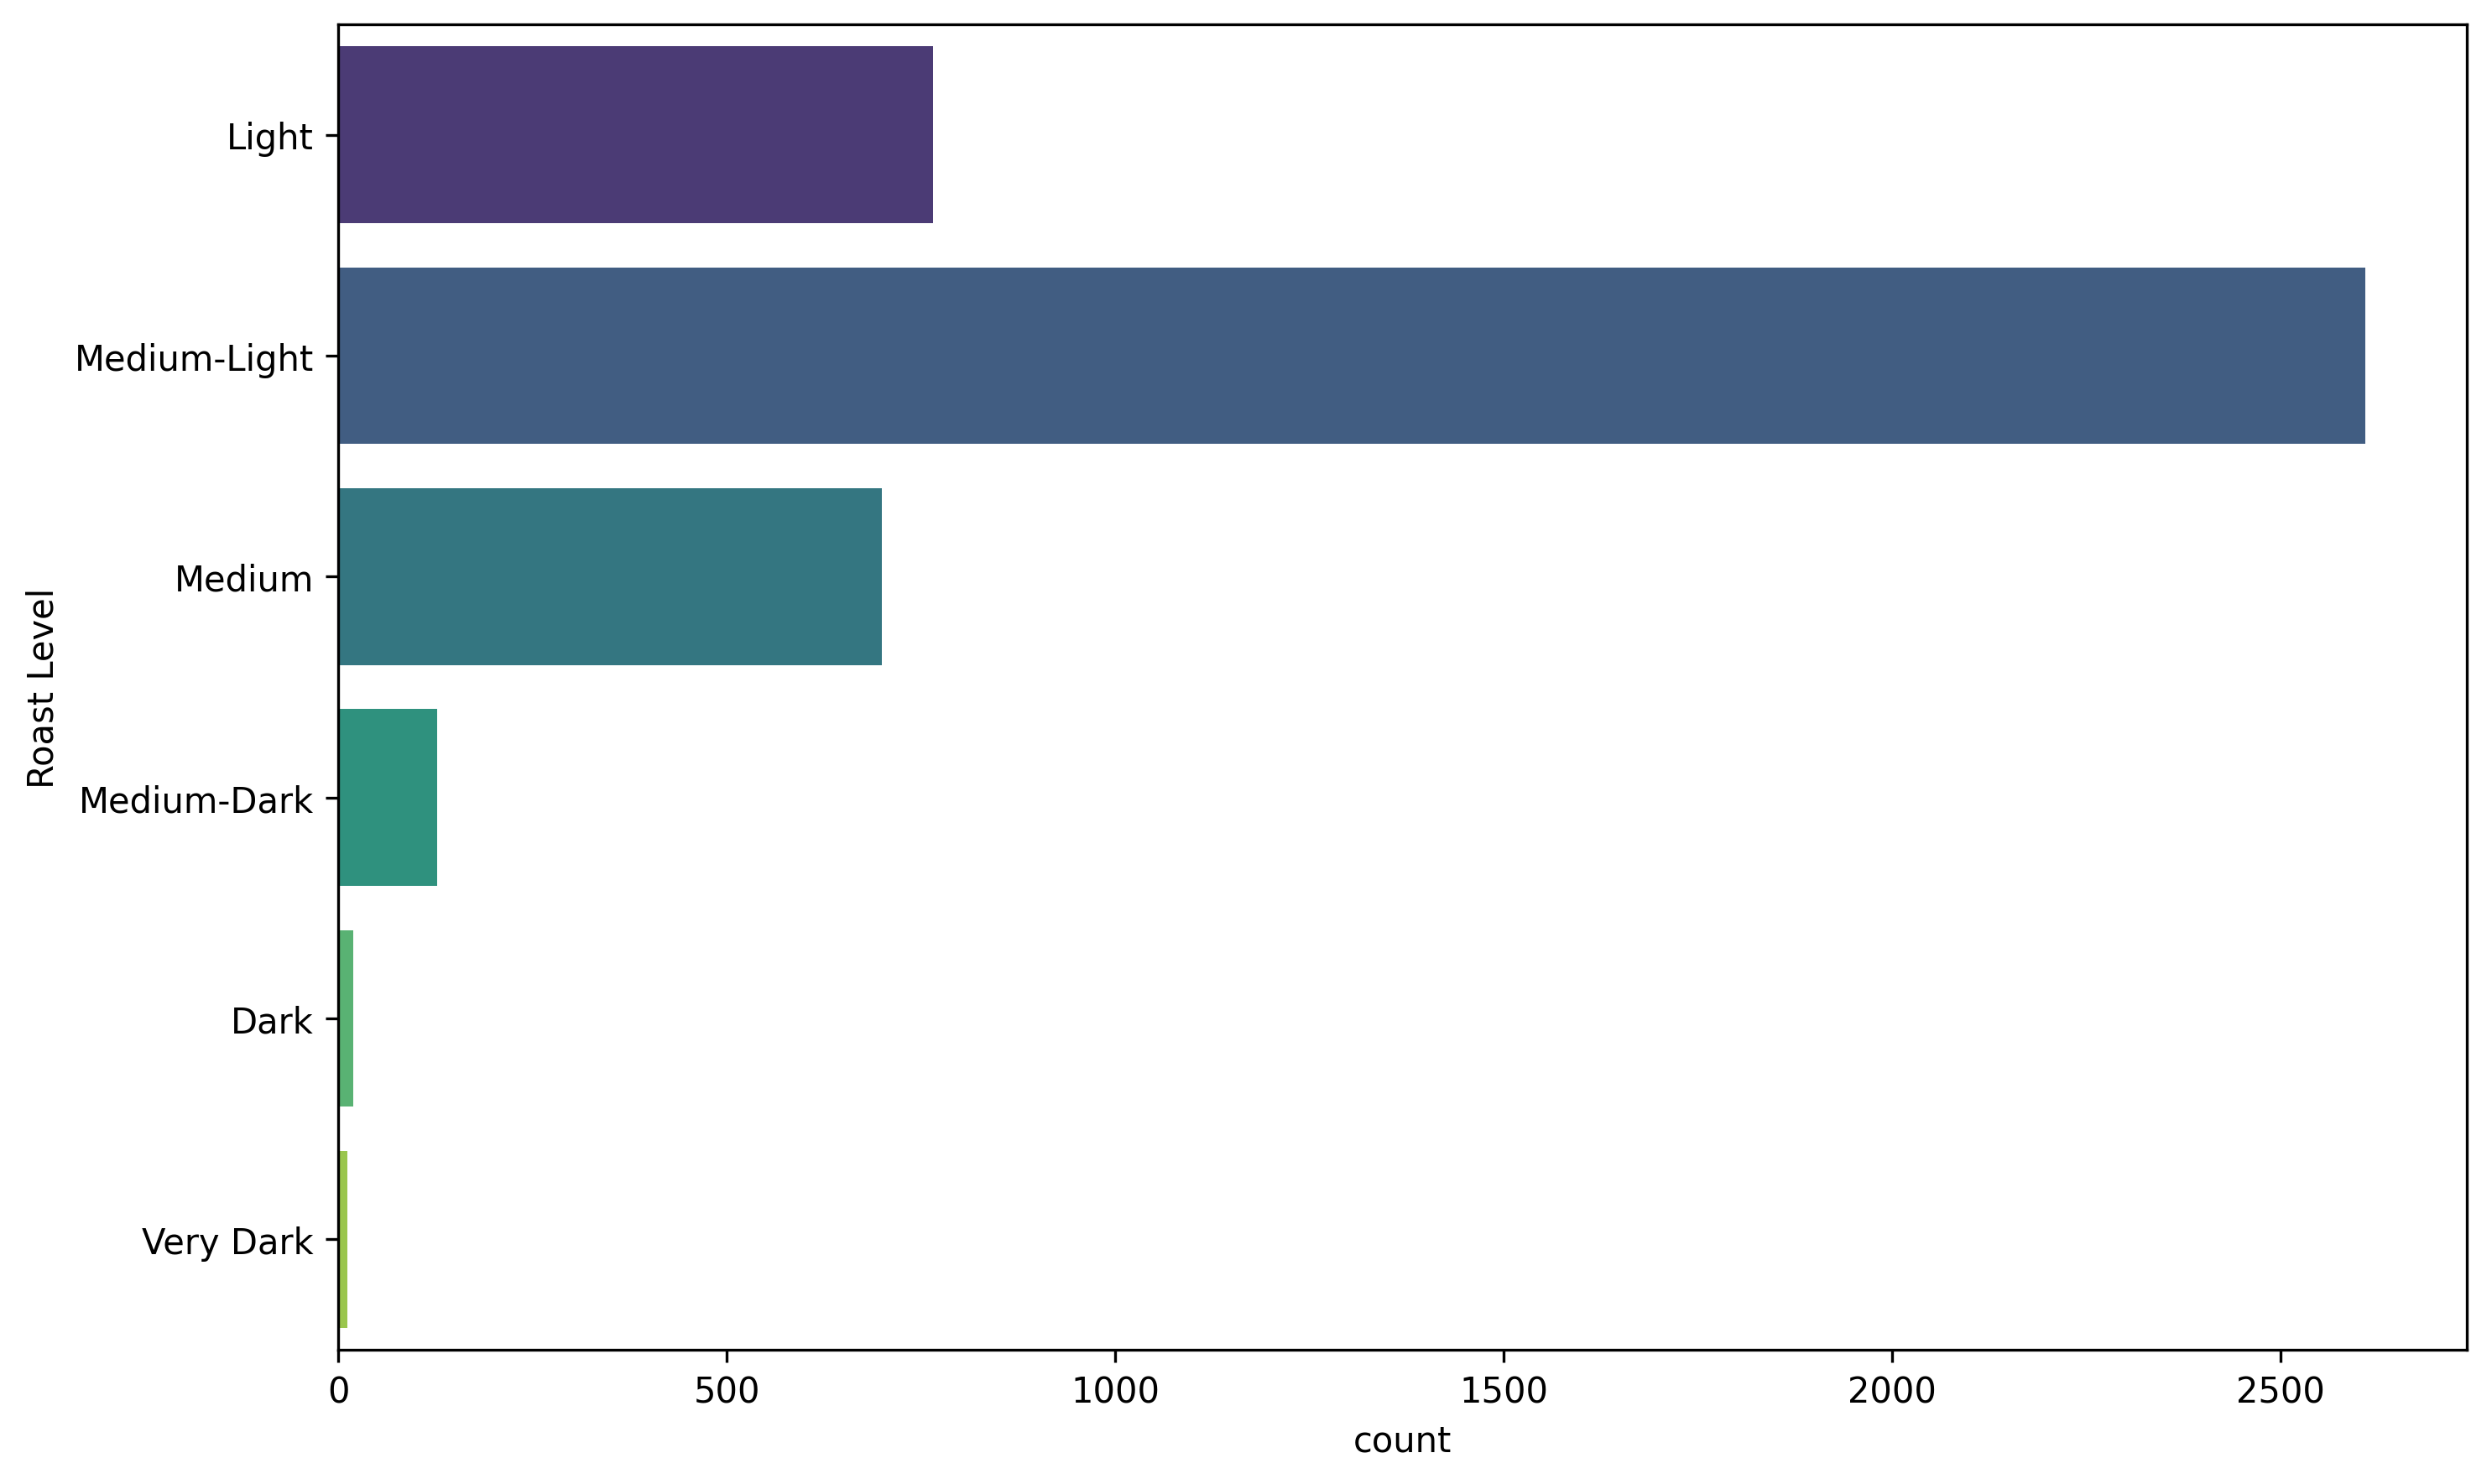

In [8]:
roast_count = coffee['roast_level'].value_counts().reset_index().sort_values('count', ascending=False)
roast_count
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(data=roast_count, y='roast_level', x='count',
            order=['Light', 'Medium-Light', 'Medium', 'Medium-Dark', 'Dark', 'Very Dark'],
            palette='viridis')
plt.ylabel('Roast Level')
plt.tight_layout()
plt.show()

### Explore Distributions and Correlations

NameError: name 'coffee_numeric' is not defined

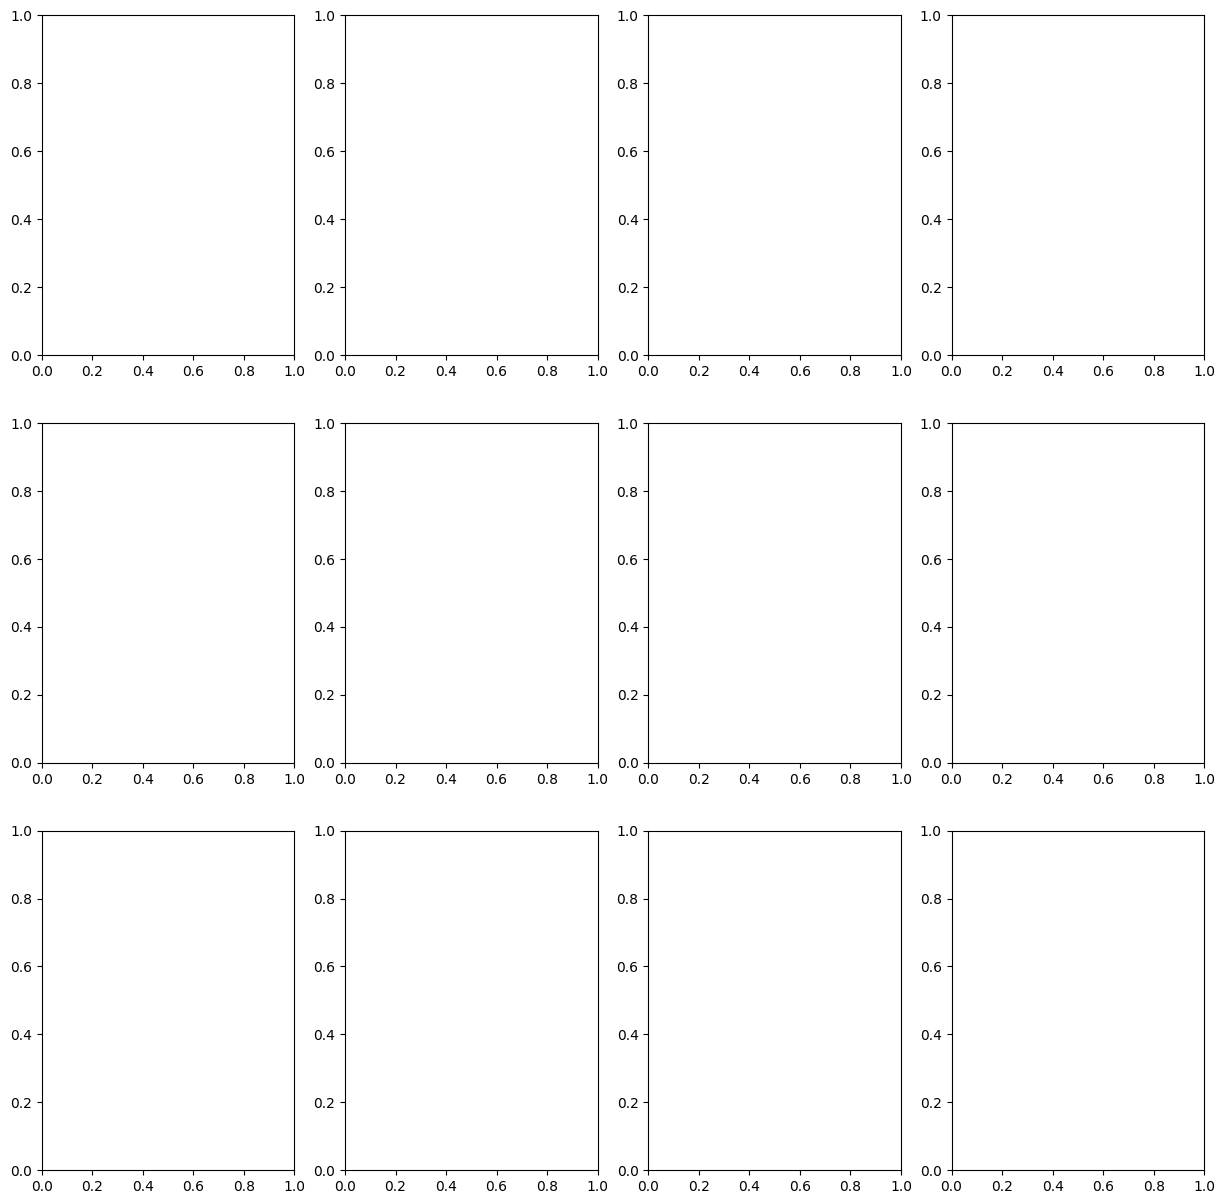

In [9]:
# Rating, acidity, body, flavor, aftertaste, acidity, agtrons, prive_per_lbs, quantity_lbs
fig, ax = plt.subplots(3, 4, figsize=(15, 15))

cols = ['rating', 'acidity', 'body', 'flavor', 'aftertaste', 'acidity', 'agtron_ground', 'agtron_external',
        'price_usd_adj_2024', 'quantity_in_lbs', 'price_usd_lb_2024']
for i, col in enumerate(cols):
    sns.histplot(coffee_numeric[col], ax=ax[i//4, i%4], kde=True)
    ax[i//4, i%4].set_title(col)

plt.tight_layout()
plt.show()


# Price per Pound

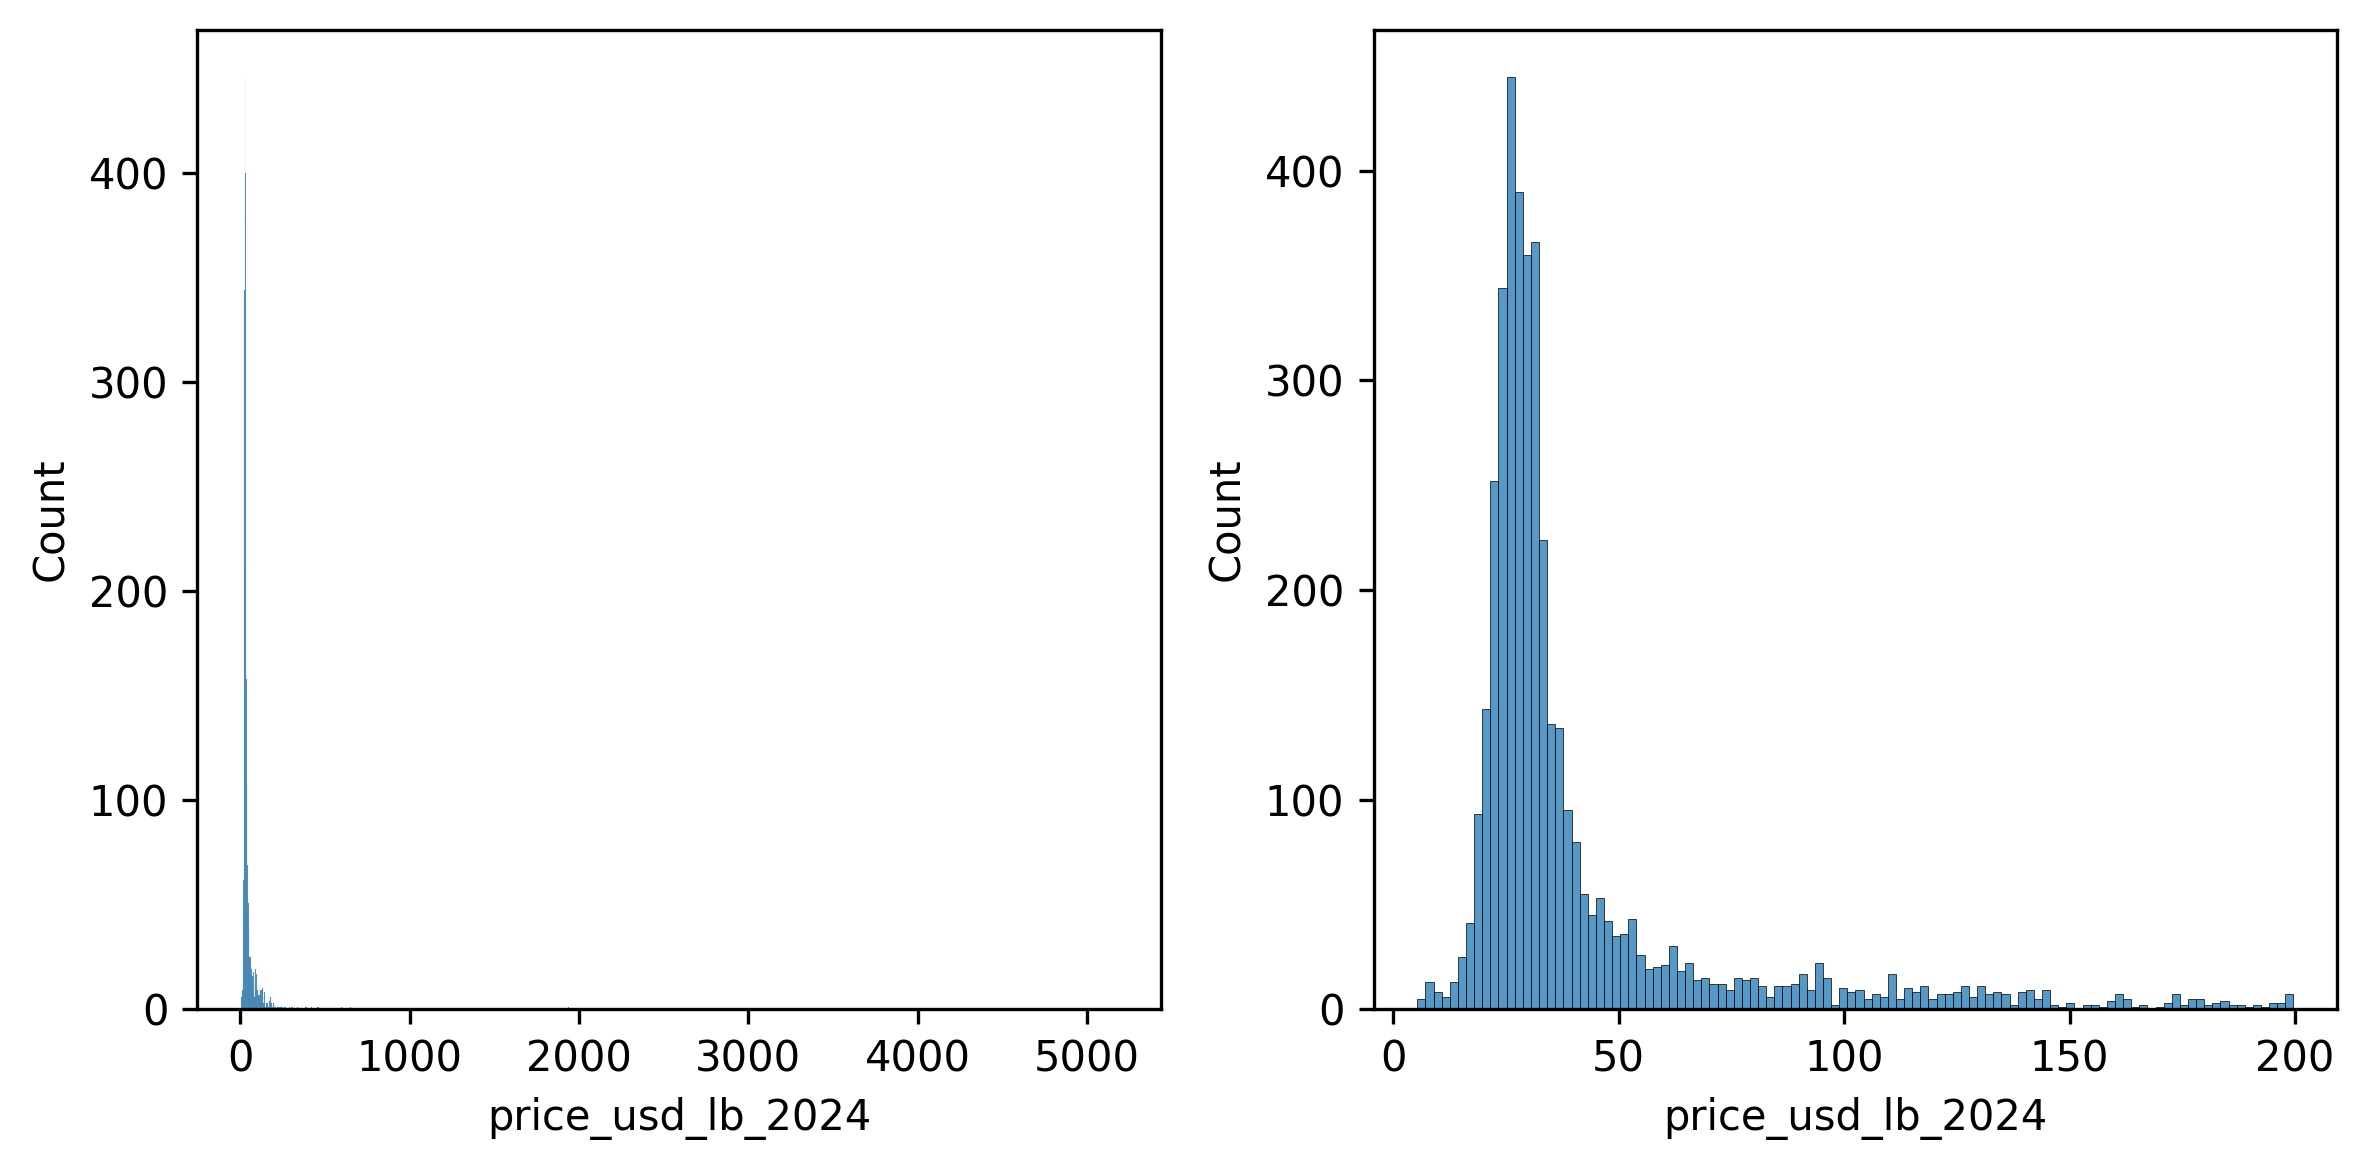

In [ ]:
COL= "price_usd_lb_2024"
filtered = coffee_numeric[coffee_numeric[COL]< 200]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(coffee_numeric, x=COL, ax=ax[0])
sns.histplot(filtered, x=COL, ax=ax[1])
plt.tight_layout()
plt.show()

<Axes: xlabel='price_usd'>

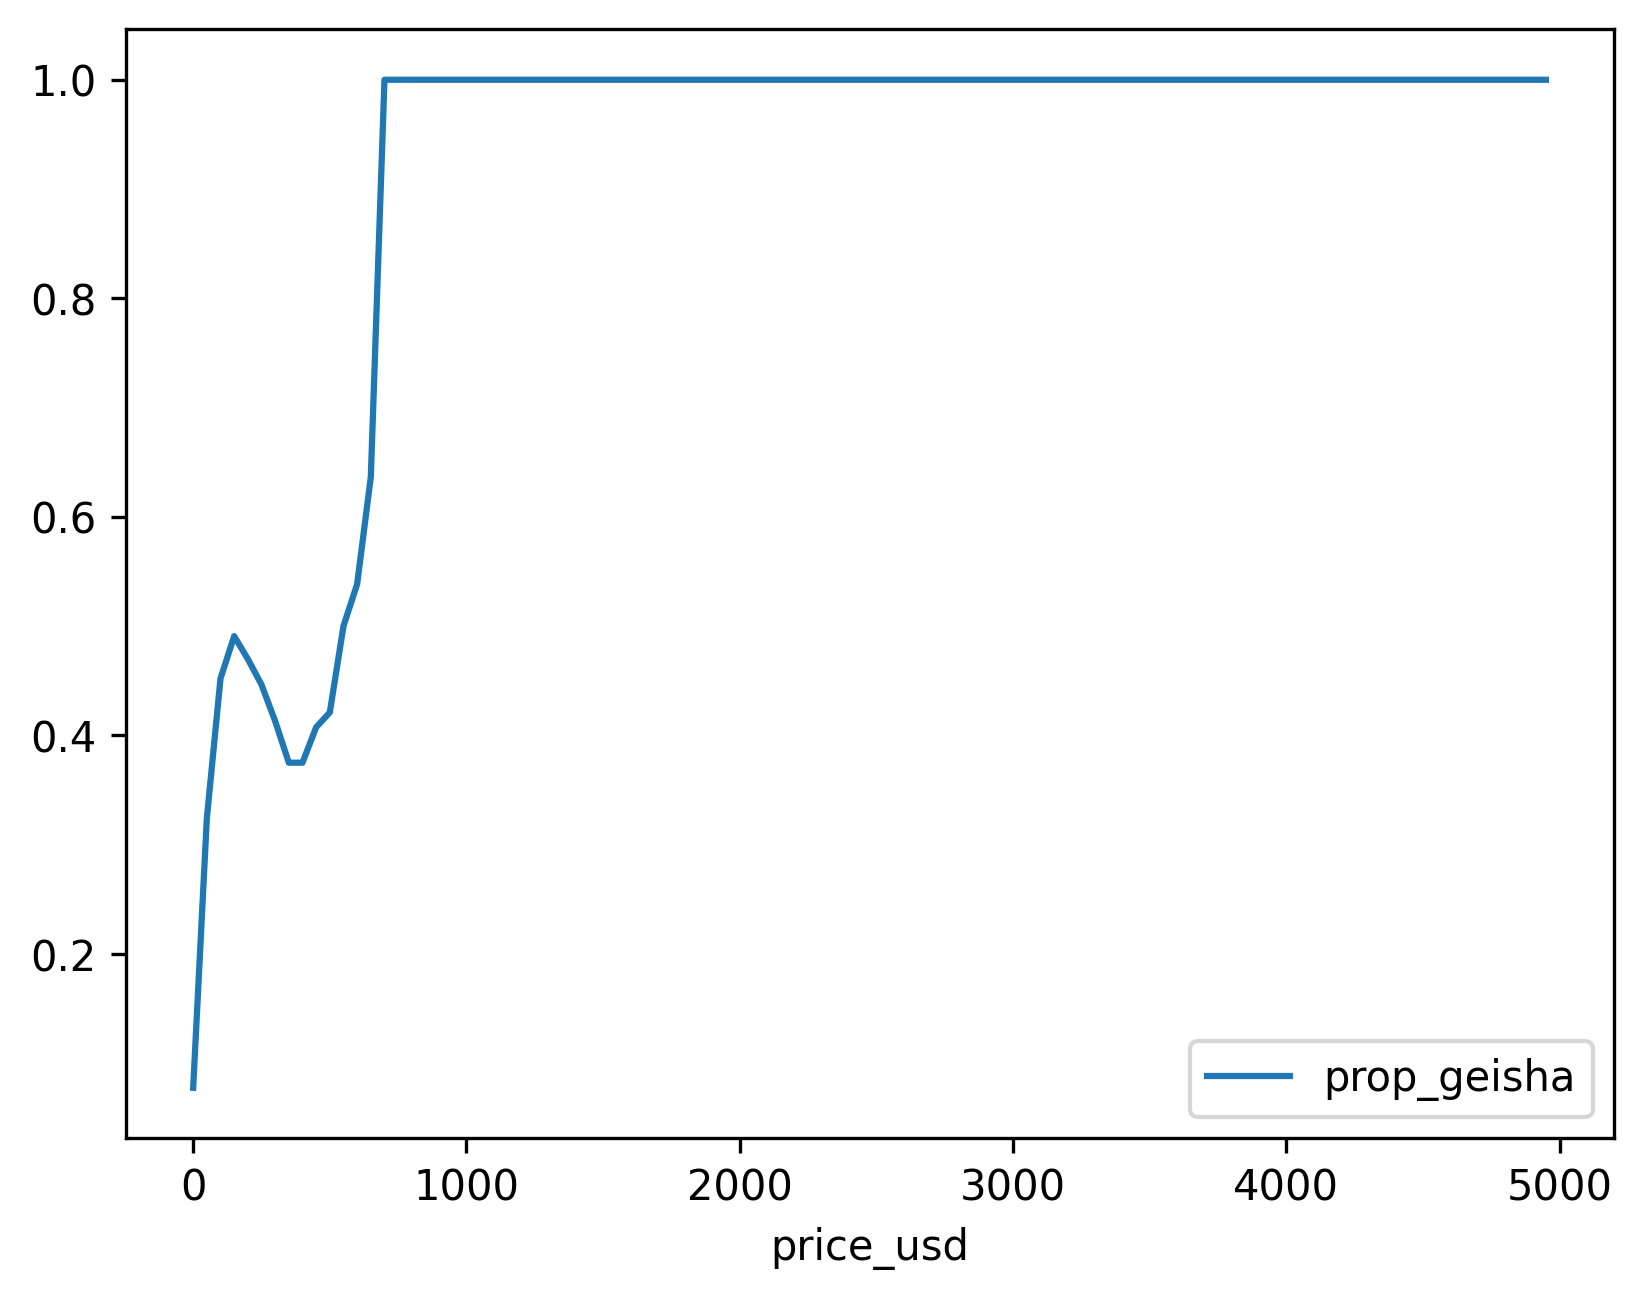

In [ ]:
# Geisha varieties make up a major proportion of the most expensive coffees
prop_geisha = {}
for i in range(0, 5000, 50):
    n_all = coffee[coffee[COL] > i].shape[0]
    n_geisha = coffee[(coffee[COL] > i) & (coffee.title.str.contains('Geisha'))].shape[0]
    prop_geisha[i] = n_geisha/n_all

df = pd.DataFrame.from_dict(prop_geisha, orient='index', columns=['prop_geisha']).reset_index(names="price_usd")

df.plot(x='price_usd', y='prop_geisha')


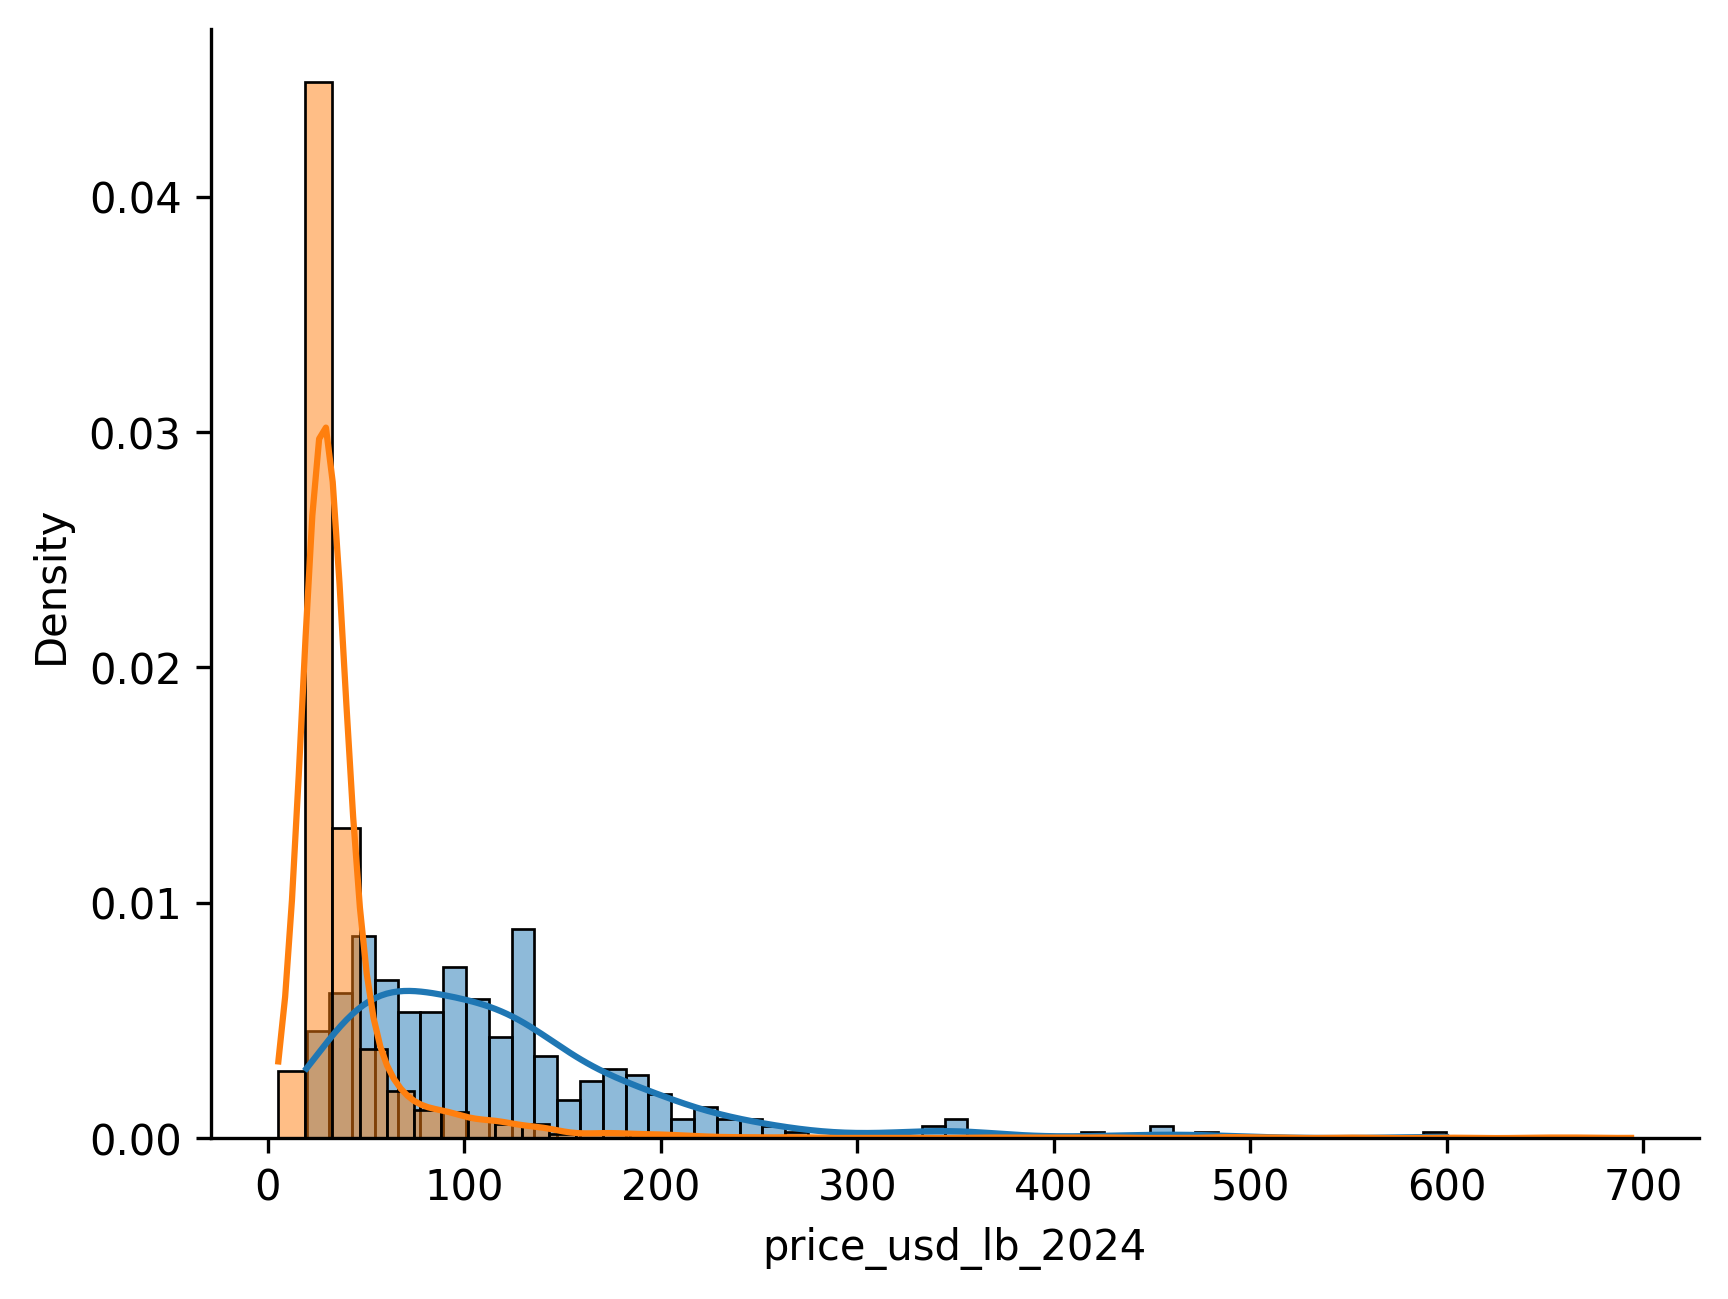

In [ ]:
mask = (coffee['title'].str.contains('Geisha'))
coffee_geisha = coffee[mask & (coffee['price_usd_lb_2024'] < 800)]
coffee_other = coffee[~mask & (coffee['price_usd_lb_2024'] < 800)]


sns.histplot(coffee_geisha, x='price_usd_lb_2024', bins=50, stat='density', kde=True)
sns.histplot(coffee_other, x='price_usd_lb_2024', bins=50, stat='density', kde=True)

<Axes: >

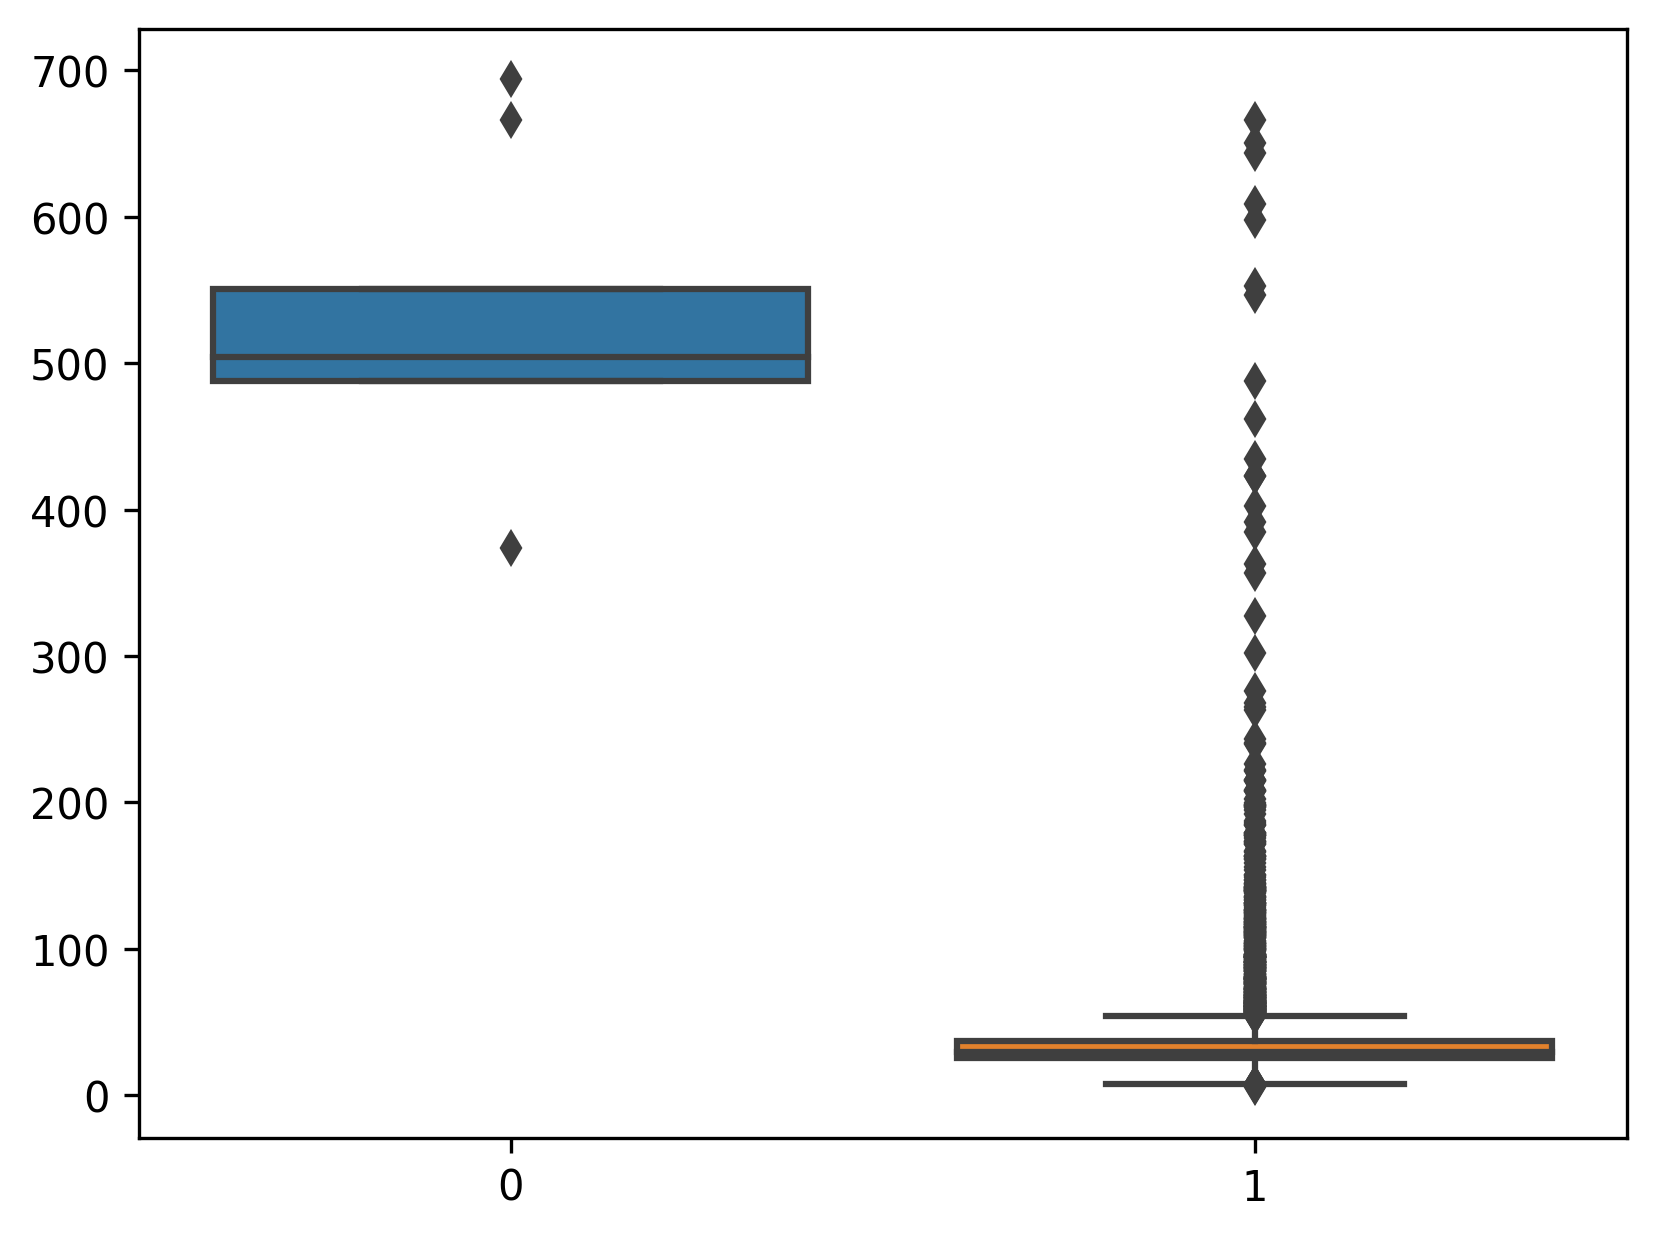

In [ ]:
coffee_civet = coffee[coffee['title'].str.contains('Civet')]
non_civet = coffee[~coffee['title'].str.contains('Civet') & ~(coffee['title'].str.contains('Geisha'))]

sns.boxplot(data=[coffee_civet['price_usd_lb_2024'], non_civet['price_usd_lb_2024']])

<Axes: xlabel='review_date'>

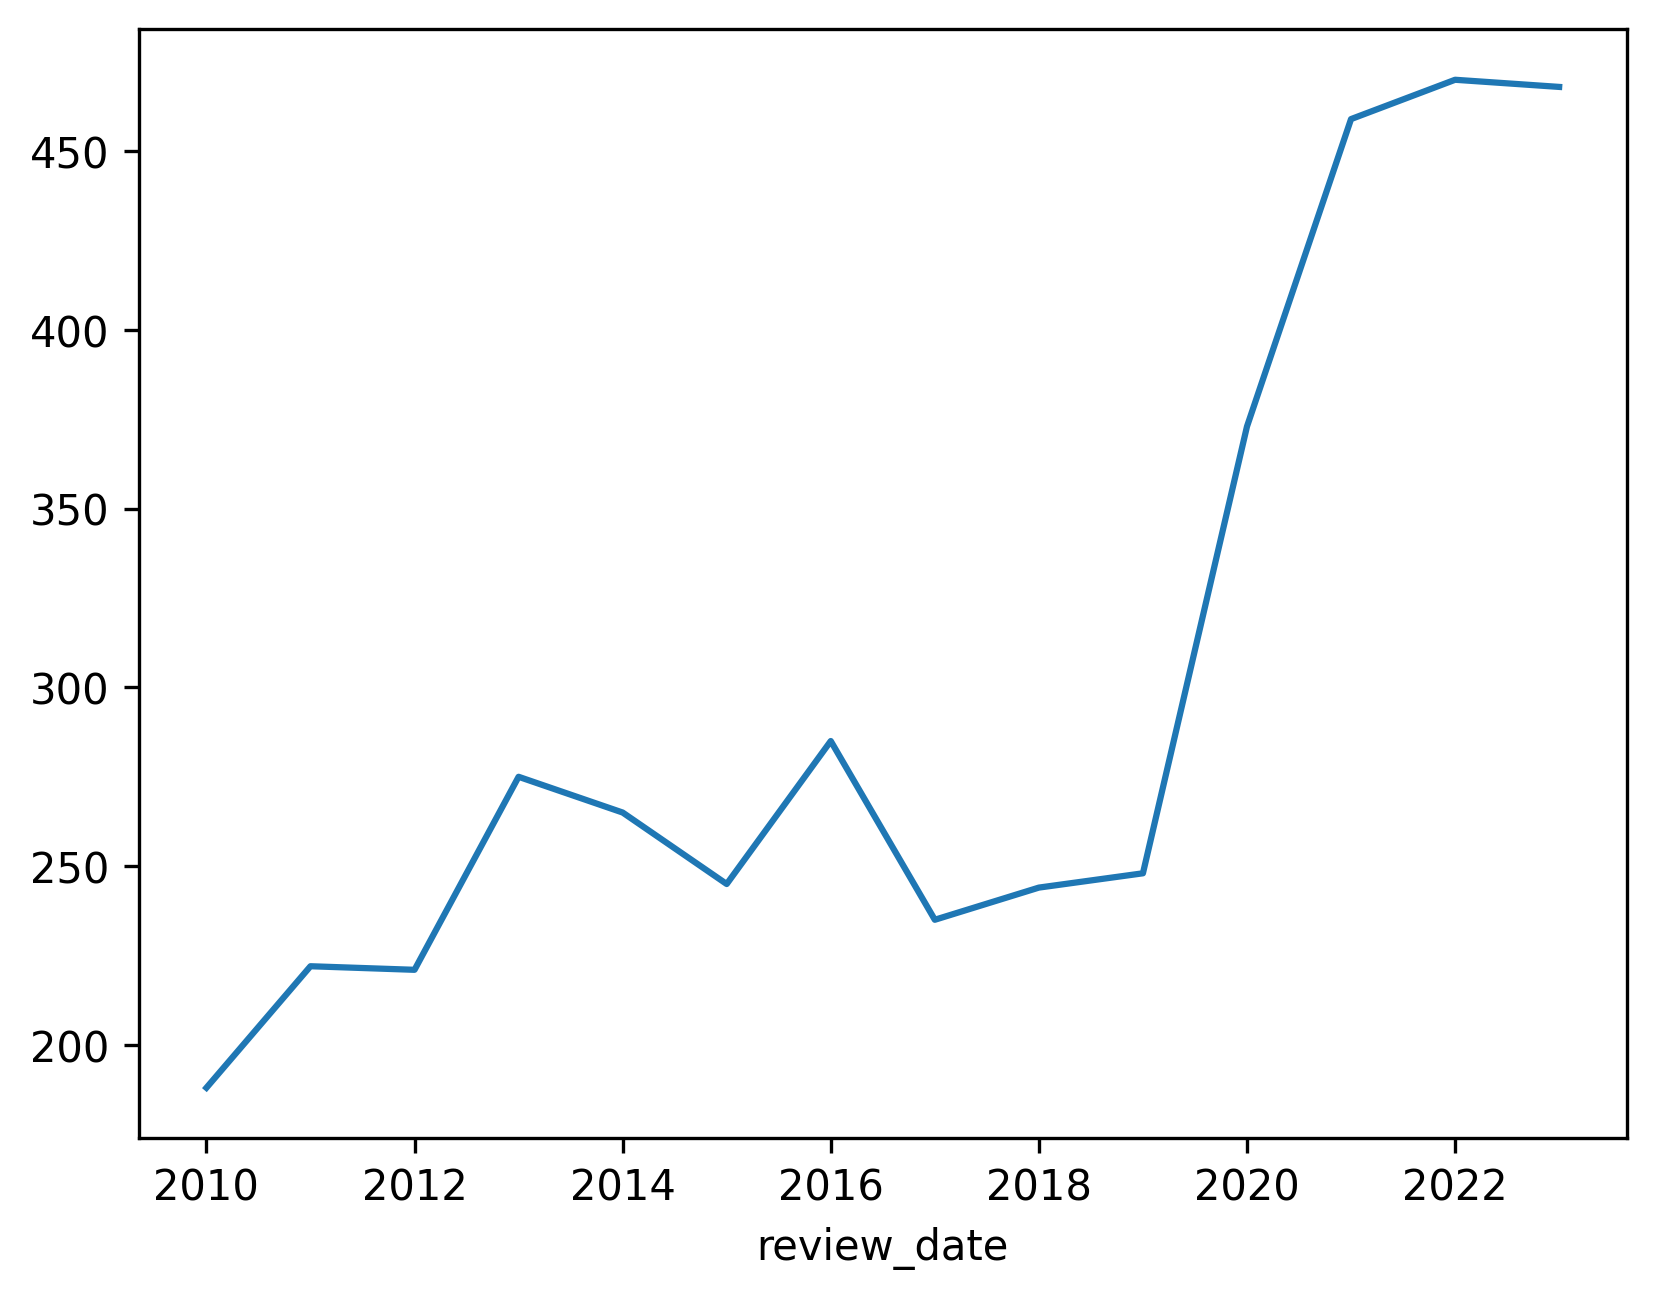

In [ ]:
# plot number of reviews over time dropping 2024
# plot cumulative over top

coffee[coffee['review_date'].dt.year != 2024]['review_date'].dt.year.value_counts().sort_index().plot()

<Axes: xlabel='review_date'>

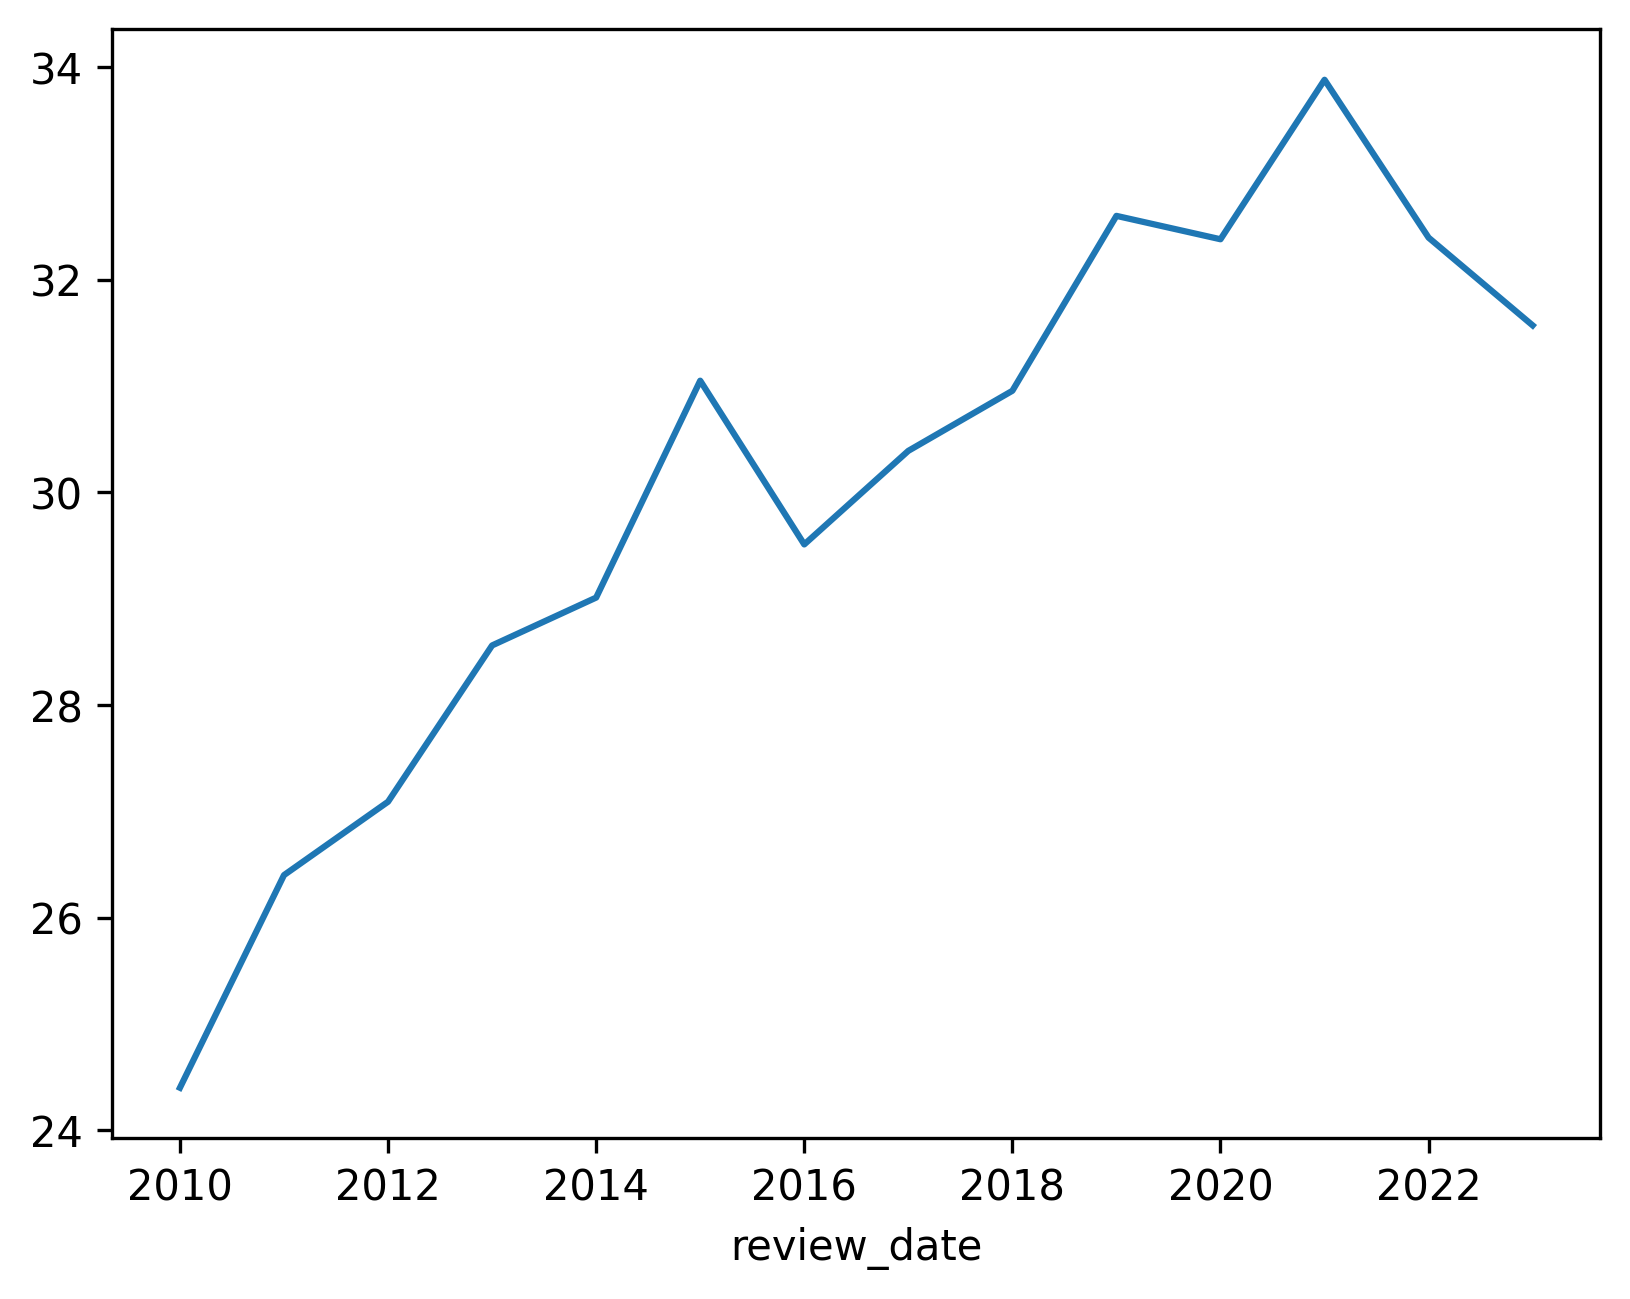

In [ ]:
# plot median yearly price over time
coffee[coffee['review_date'].dt.year != 2024].groupby(coffee['review_date'].dt.year)['price_usd_lb_2024'].median().plot()


<Axes: xlabel='review_date'>

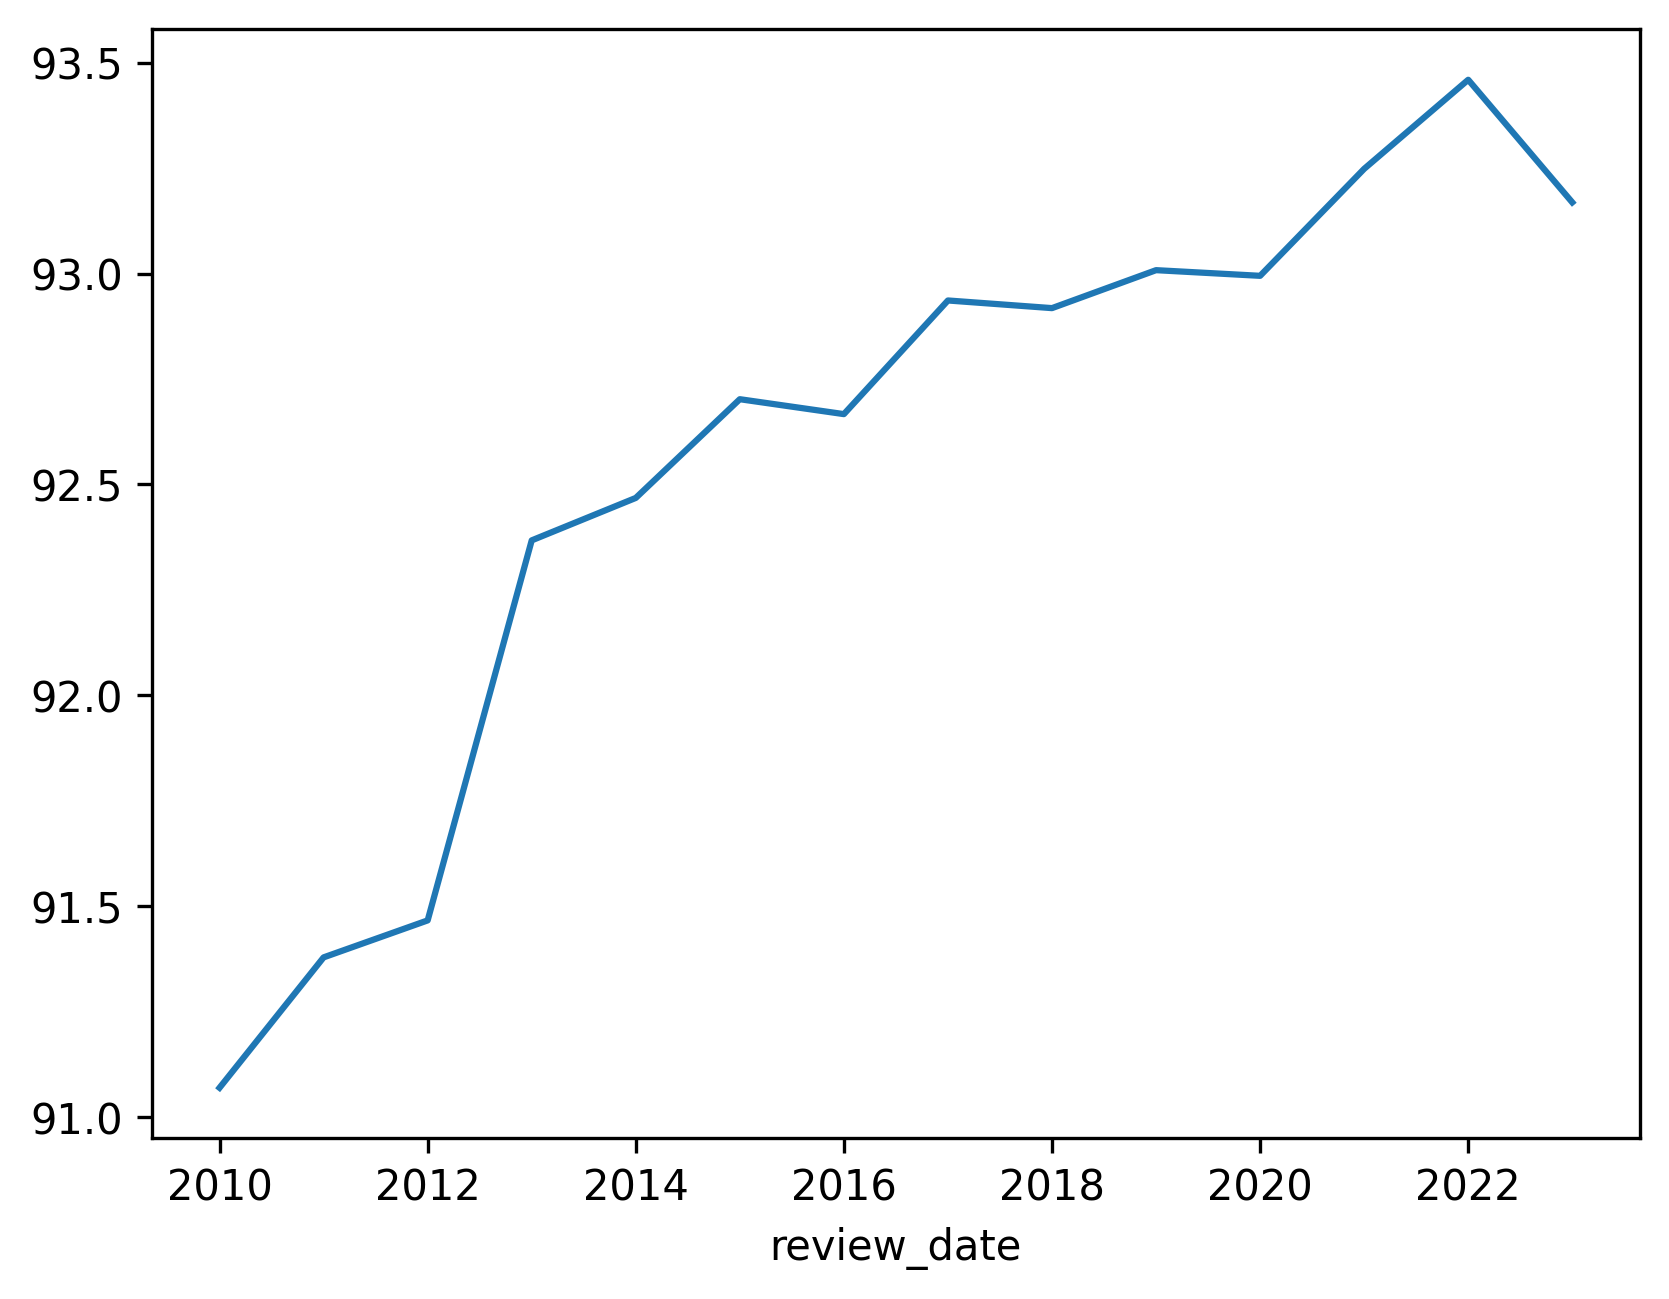

In [ ]:
# plot average review rating over time
coffee[coffee['review_date'].dt.year != 2024].groupby(coffee['review_date'].dt.year)['rating'].mean().plot()

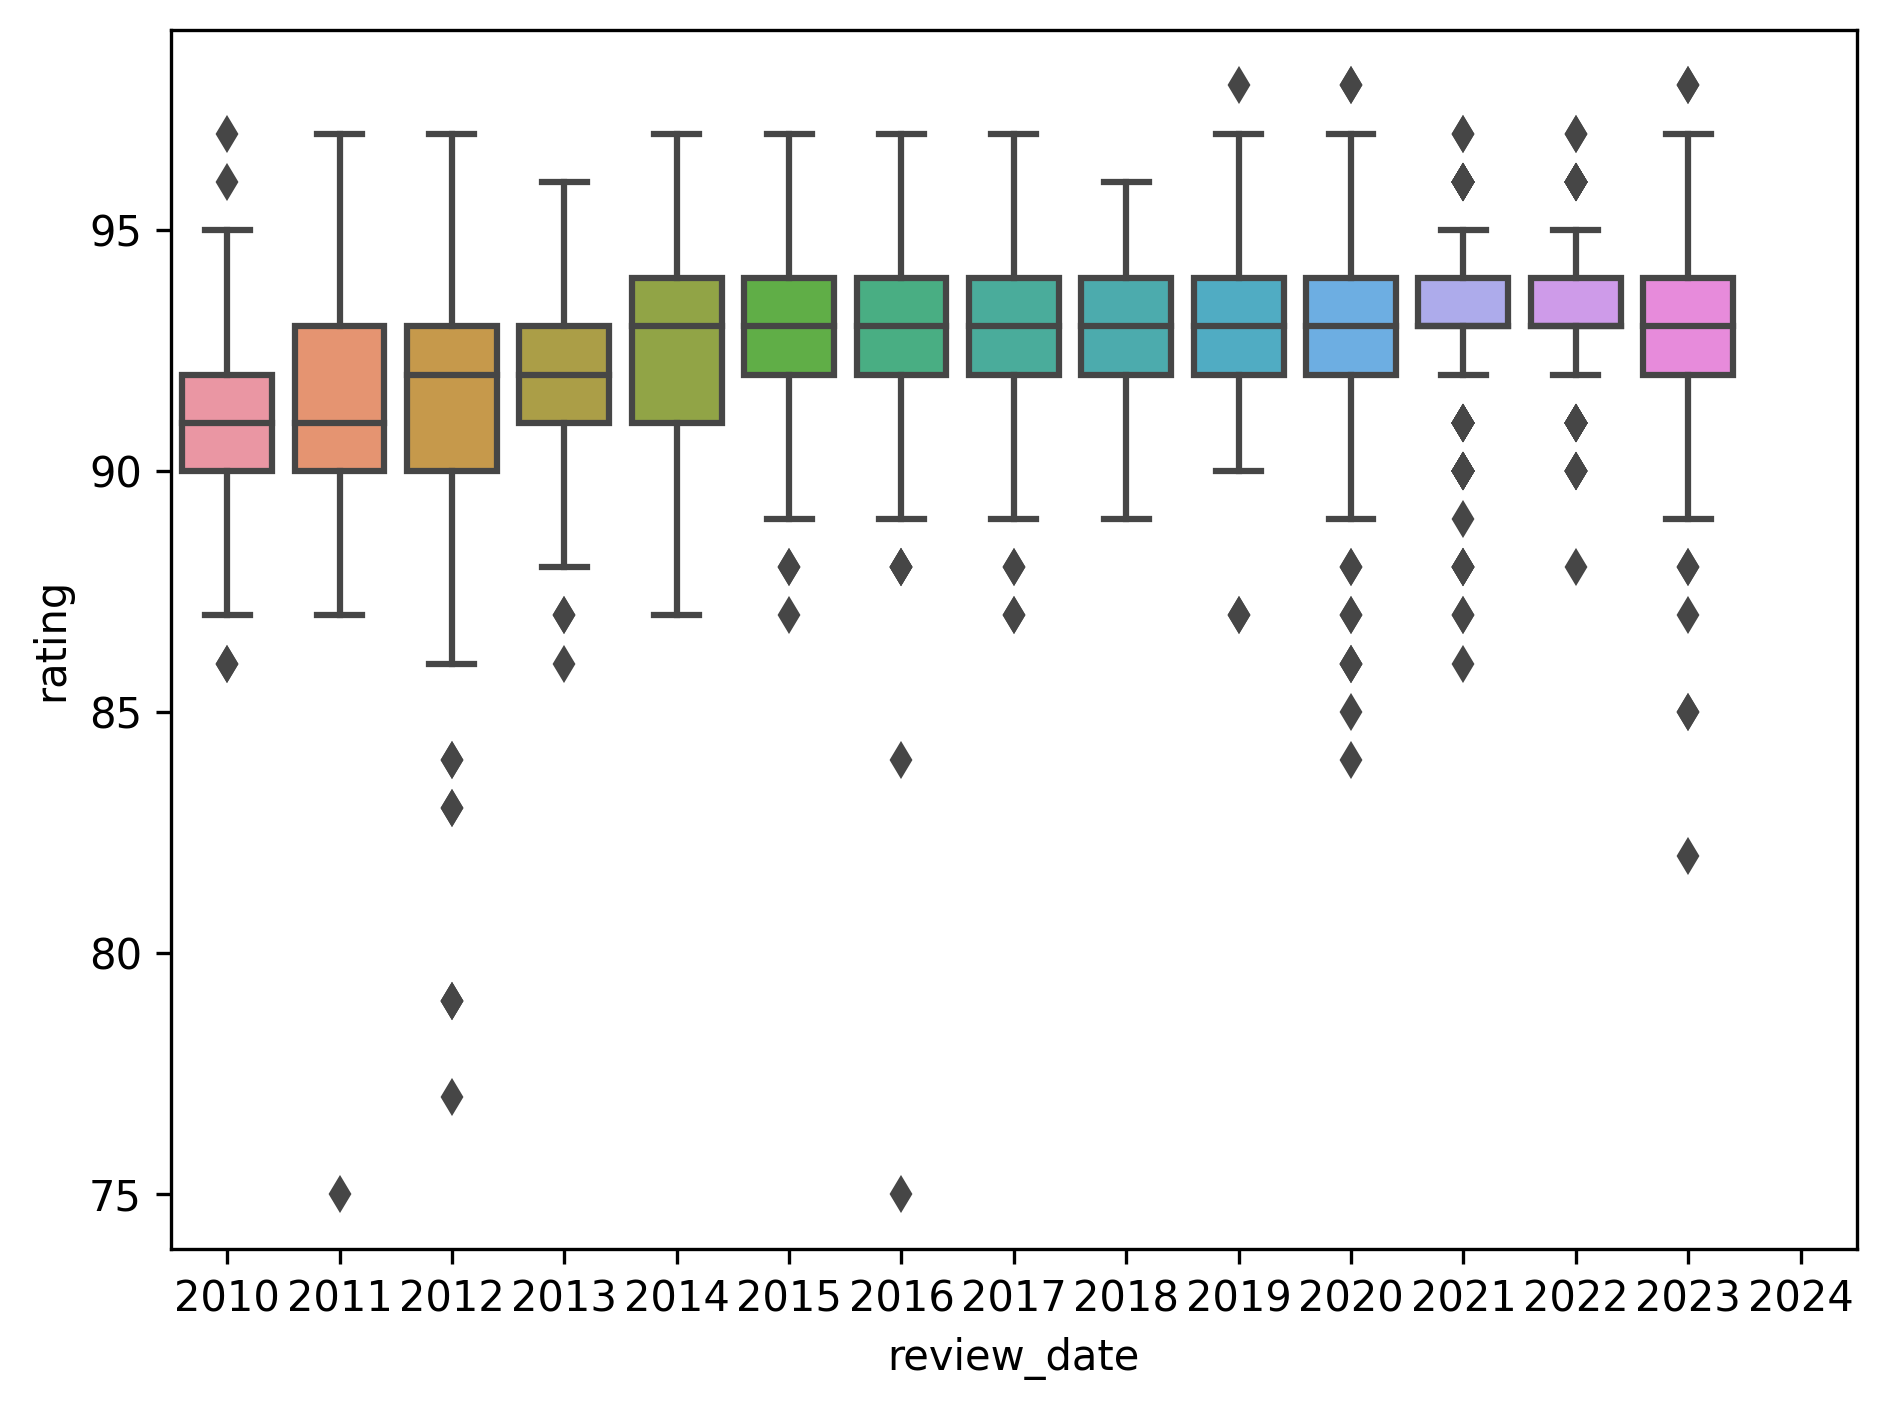

In [ ]:
# plot boxplot of ratings by year
sns.boxplot(data=coffee[coffee['review_date'].dt.year != 2024], x=coffee['review_date'].dt.year, y='rating')
plt.tight_layout()

<Axes: xlabel='coffee_origin_country'>

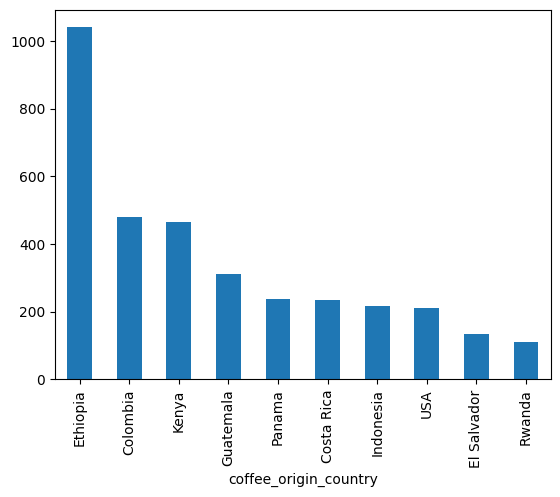

In [ ]:
coffee_filtered.coffee_origin_country.value_counts().plot(kind='bar')